Detected Project Root: d:\Kifiya AI Master Training Program 5 6 &7\week-6\intelligent-complaint-analysis
Attempting to load raw data from: d:\Kifiya AI Master Training Program 5 6 &7\week-6\intelligent-complaint-analysis\data\raw\complaints.csv
Attempting to load filtered data from: d:\Kifiya AI Master Training Program 5 6 &7\week-6\intelligent-complaint-analysis\data\filtered\filtered_complaints.csv


C:\Users\desta\AppData\Local\Temp\ipykernel_34164\19824303.py:40: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv(raw_csv_path)



Raw dataset loaded successfully for initial EDA!
Raw total rows: 9609797, Raw total columns: 18

Cleaned and filtered dataset loaded successfully!
Filtered total rows: 518654, Filtered total columns: 3

--- Performing EDA for RAW Data ---
Total number of raw complaints: 9609797

Product Distribution (Raw - Top 10):
Product
Credit reporting or other personal consumer reports                             4834855
Credit reporting, credit repair services, or other personal consumer reports    2163857
Debt collection                                                                  799197
Mortgage                                                                         422254
Checking or savings account                                                      291178
Credit card                                                                      226686
Credit card or prepaid card                                                      206369
Money transfer, virtual currency, or money service        

C:\Users\desta\AppData\Local\Temp\ipykernel_34164\19824303.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=raw_product_distribution.index, x=raw_product_distribution.values, palette='viridis')


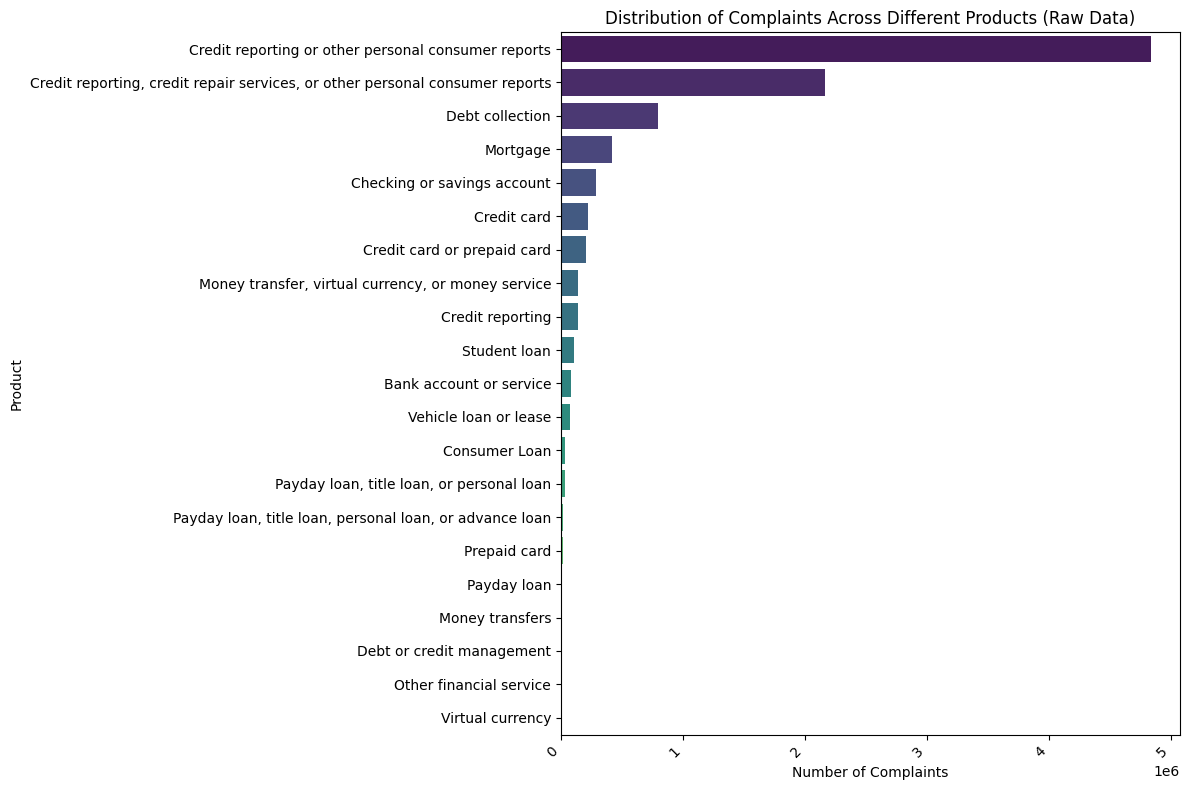


Raw Complaints with narrative: 2980756
Raw Complaints without narrative: 6629041
Percentage with narrative (raw): 31.02%


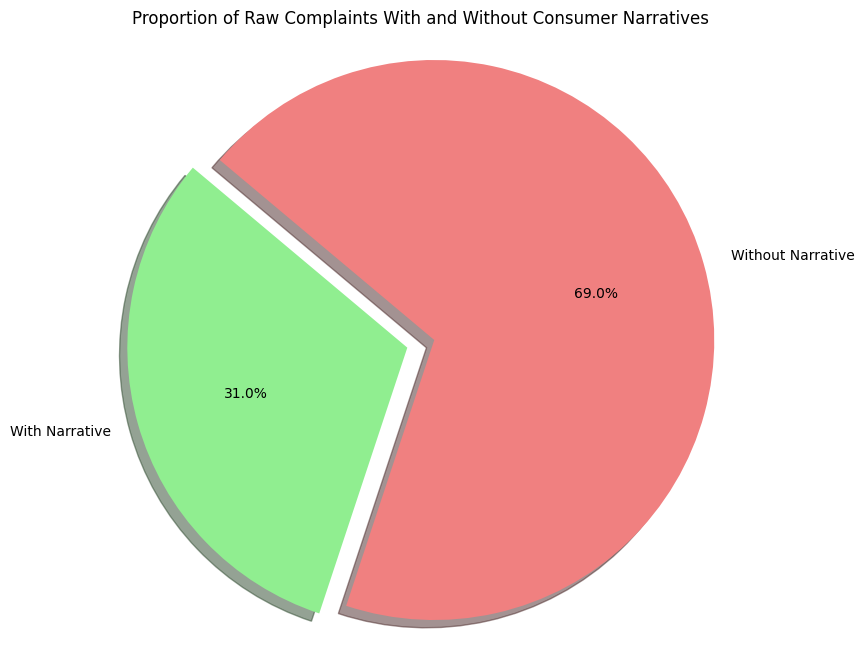


Descriptive statistics for Raw Narrative Word Count:
count    2.980756e+06
mean     1.755976e+02
std      2.259282e+02
min      1.000000e+00
25%      5.900000e+01
50%      1.140000e+02
75%      2.090000e+02
max      6.469000e+03
Name: Narrative_Word_Count_Raw, dtype: float64


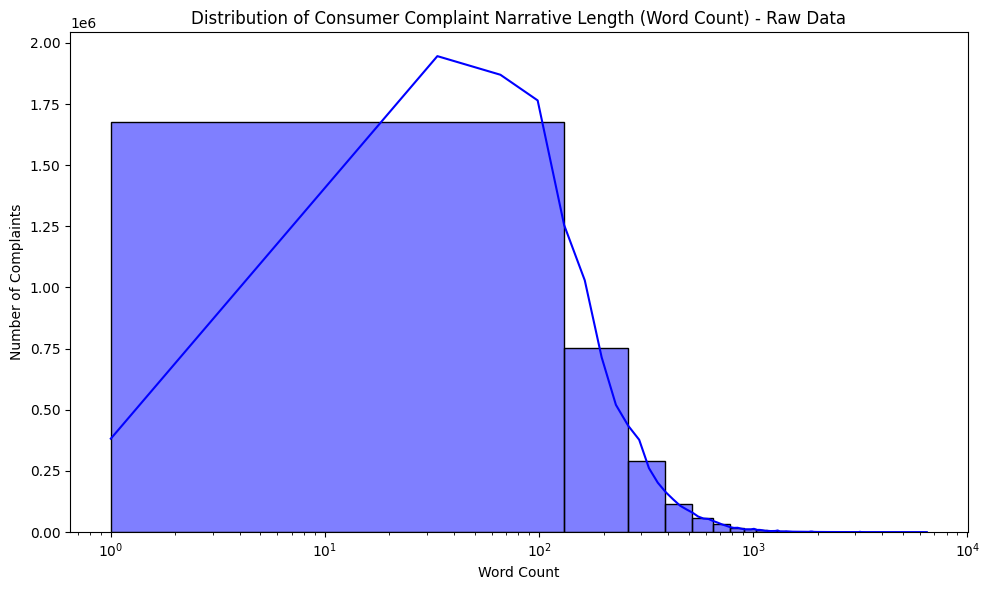


--- Skipping FILTERED data EDA as filtered data was not loaded or is empty. ---

--- EDA Complete ---


In [ ]:
# File: notebooks/eda.ipynb
# data exploration and visualization for the Consumer Complaints dataset
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os # To handle paths relative to the notebook

# --- 0. Set up Paths ---
# In a Jupyter Notebook, __file__ is not defined.
# We determine the project root dynamically based on the current working directory.
# This assumes the notebook is launched either from the project root or the 'notebooks/' directory.

current_working_dir = os.getcwd()

# Check if the current working directory ends with 'notebooks' (case-insensitive)
# This handles cases where Jupyter is launched from the 'notebooks' folder itself.
if current_working_dir.lower().endswith(os.path.sep + 'notebooks'):
    # If so, the project root is one directory up
    project_root = os.path.abspath(os.path.join(current_working_dir, os.pardir))
else:
    # Otherwise, assume the current working directory IS the project root
    project_root = current_working_dir

# Now construct the paths relative to the derived project_root
raw_csv_path = os.path.join(project_root, 'data', 'raw', 'complaints.csv')
processed_csv_path = os.path.join(project_root, 'data', 'filtered', 'filtered_complaints.csv')

print(f"Detected Project Root: {project_root}")
print(f"Attempting to load raw data from: {raw_csv_path}")
print(f"Attempting to load filtered data from: {processed_csv_path}")

# --- 1. Load Data for EDA ---

# Load RAW data for initial product distribution and narrative length analysis
df_raw = pd.DataFrame() # Initialize as empty
raw_data_available = False
try:
    df_raw = pd.read_csv(raw_csv_path)
    print("\nRaw dataset loaded successfully for initial EDA!")
    print(f"Raw total rows: {df_raw.shape[0]}, Raw total columns: {df_raw.shape[1]}")
    raw_data_available = True
except FileNotFoundError:
    print(f"\nError: Raw data '{raw_csv_path}' not found.")
    print("Please ensure the original 'complaints.csv' is in 'data/raw/'.")

# Load CLEANED and FILTERED data for detailed EDA
df_filtered = pd.DataFrame() # Initialize as empty
filtered_data_available = False
try:
    df_filtered = pd.read_csv(processed_csv_path)
    print("\nCleaned and filtered dataset loaded successfully!")
    print(f"Filtered total rows: {df_filtered.shape[0]}, Filtered total columns: {df_filtered.shape[1]}")
    filtered_data_available = True
except FileNotFoundError:
    print(f"\nError: Filtered data '{processed_csv_path}' not found.")
    print("Please run 'src/preprocess.py' first to generate this file.")
    # Provide a minimal dummy DataFrame for df_filtered so other cells can at least run without crashing,
    # though the EDA on it will be skipped due to `filtered_data_available` being False.
    dummy_data = {
        'Product': ['Credit card', 'Personal loan', 'Buy Now, Pay Later (BNPL)'],
        'Cleaned_Narrative': ['dummy complaint one', 'dummy complaint two', 'dummy complaint three'],
        'Company': ['DummyBank', 'DummyLoan', 'DummyBNPL'],
        'Complaint ID': [1, 2, 3]
    }
    df_filtered = pd.DataFrame(dummy_data)


# --- 2. EDA: Total Complaints & Product Distribution (Raw Data) ---
if raw_data_available and not df_raw.empty and 'Product' in df_raw.columns:
    print("\n--- Performing EDA for RAW Data ---")
    print(f"Total number of raw complaints: {df_raw.shape[0]}")

    print("\nProduct Distribution (Raw - Top 10):")
    raw_product_distribution = df_raw['Product'].value_counts()
    print(raw_product_distribution.head(10))

    plt.figure(figsize=(12, 8))
    sns.barplot(y=raw_product_distribution.index, x=raw_product_distribution.values, palette='viridis')
    plt.title('Distribution of Complaints Across Different Products (Raw Data)')
    plt.xlabel('Number of Complaints')
    plt.ylabel('Product')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Raw Narrative Existence
    raw_has_narrative = df_raw['Consumer complaint narrative'].notna().sum()
    raw_no_narrative = df_raw['Consumer complaint narrative'].isna().sum()
    print(f"\nRaw Complaints with narrative: {raw_has_narrative}")
    print(f"Raw Complaints without narrative: {raw_no_narrative}")
    print(f"Percentage with narrative (raw): {(raw_has_narrative / df_raw.shape[0] * 100):.2f}%")

    labels_raw = ['With Narrative', 'Without Narrative']
    sizes_raw = [raw_has_narrative, raw_no_narrative]
    colors_raw = ['lightgreen', 'lightcoral']
    explode_raw = (0.1, 0)

    plt.figure(figsize=(8, 8))
    plt.pie(sizes_raw, explode=explode_raw, labels=labels_raw, colors=colors_raw, autopct='%1.1f%%',
            shadow=True, startangle=140)
    plt.title('Proportion of Raw Complaints With and Without Consumer Narratives')
    plt.axis('equal')
    plt.show()

    # Raw Narrative Length Distribution
    if 'Consumer complaint narrative' in df_raw.columns:
        df_raw['Narrative_Word_Count_Raw'] = df_raw['Consumer complaint narrative'].apply(
            lambda x: len(str(x).split()) if pd.notna(x) and str(x).strip() != 'nan' else 0
        )
        narrative_df_raw_actual = df_raw[df_raw['Narrative_Word_Count_Raw'] > 0]

        if not narrative_df_raw_actual.empty:
            print("\nDescriptive statistics for Raw Narrative Word Count:")
            print(narrative_df_raw_actual['Narrative_Word_Count_Raw'].describe())

            plt.figure(figsize=(10, 6))
            sns.histplot(narrative_df_raw_actual['Narrative_Word_Count_Raw'], bins=50, kde=True, color='blue')
            plt.title('Distribution of Consumer Complaint Narrative Length (Word Count) - Raw Data')
            plt.xlabel('Word Count')
            plt.ylabel('Number of Complaints')
            plt.xscale('log')
            plt.tight_layout()
            plt.show()
        else:
            print("No narratives with word count > 0 in raw data to analyze word count.")
else:
    print("\n--- Skipping RAW data EDA as raw data was not loaded or is empty. ---")


# --- 3. EDA: Product Distribution (Filtered Data) & Cleaned Narrative Length ---
if filtered_data_available and not df_filtered.empty and 'Product' in df_filtered.columns:
    print("\n--- Performing EDA for FILTERED Data ---")
    print(f"Total number of filtered complaints: {df_filtered.shape[0]}")

    print("\nProduct Distribution (Filtered Data):")
    filtered_product_distribution = df_filtered['Product'].value_counts()
    print(filtered_product_distribution)

    plt.figure(figsize=(10, 6))
    sns.barplot(y=filtered_product_distribution.index, x=filtered_product_distribution.values, palette='plasma')
    plt.title('Distribution of Complaints Across Specified Products (Filtered Data)')
    plt.xlabel('Number of Complaints')
    plt.ylabel('Product')
    plt.tight_layout()
    plt.show()

    print("\n--- EDA: Cleaned Consumer Complaint Narrative Length ---")

    if 'Cleaned_Narrative' in df_filtered.columns:
        # Calculate word count for cleaned narratives
        df_filtered['Cleaned_Narrative_Word_Count'] = df_filtered['Cleaned_Narrative'].apply(
            lambda x: len(str(x).split()) if pd.notna(x) and str(x).strip() != '' else 0
        )

        cleaned_narrative_df_actual = df_filtered[df_filtered['Cleaned_Narrative_Word_Count'] > 0]

        if not cleaned_narrative_df_actual.empty:
            print("\nDescriptive statistics for Cleaned Narrative Word Count:")
            print(cleaned_narrative_df_actual['Cleaned_Narrative_Word_Count'].describe())

            print(f"\nMinimum cleaned narrative word count: {cleaned_narrative_df_actual['Cleaned_Narrative_Word_Count'].min()}")
            print(f"Maximum cleaned narrative word count: {cleaned_narrative_df_actual['Cleaned_Narrative_Word_Count'].max()}")
            print(f"Average cleaned narrative word count: {cleaned_narrative_df_actual['Cleaned_Narrative_Word_Count'].mean():.2f}")
            print(f"Median cleaned narrative word count: {cleaned_narrative_df_actual['Cleaned_Narrative_Word_Count'].median()}")

            # Very short/long narratives for cleaned data
            short_narratives_cleaned = cleaned_narrative_df_actual[cleaned_narrative_df_actual['Cleaned_Narrative_Word_Count'] < 5]
            long_narratives_cleaned = cleaned_narrative_df_actual[cleaned_narrative_df_actual['Cleaned_Narrative_Word_Count'] > cleaned_narrative_df_actual['Cleaned_Narrative_Word_Count'].quantile(0.99)]

            print(f"\nNumber of very short cleaned narratives (less than 5 words): {len(short_narratives_cleaned)}")
            if not short_narratives_cleaned.empty:
                print("Example short cleaned narrative:")
                print(short_narratives_cleaned['Cleaned_Narrative'].iloc[0])

            print(f"\nNumber of very long cleaned narratives (top 1% based on word count): {len(long_narratives_cleaned)}")
            if not long_narratives_cleaned.empty:
                print("Example long cleaned narrative (first from top 1%):")
                print(long_narratives_cleaned['Cleaned_Narrative'].iloc[0])

            plt.figure(figsize=(10, 6))
            sns.histplot(cleaned_narrative_df_actual['Cleaned_Narrative_Word_Count'], bins=50, kde=True, color='purple')
            plt.title('Distribution of Cleaned Consumer Complaint Narrative Length (Word Count)')
            plt.xlabel('Word Count')
            plt.ylabel('Number of Complaints')
            plt.xscale('log')
            plt.tight_layout()
            plt.show()

            plt.figure(figsize=(10, 6))
            sns.boxplot(y=cleaned_narrative_df_actual['Cleaned_Narrative_Word_Count'], color='darkseagreen')
            plt.title('Box Plot of Cleaned Consumer Complaint Narrative Length')
            plt.ylabel('Word Count')
            plt.yscale('log')
            plt.tight_layout()
            plt.show()

        else:
            print("No cleaned narratives with word count > 0 found for analysis.")
    else:
        print("Skipping Cleaned Narrative Length EDA as 'Cleaned_Narrative' column is missing.")


    # Complaints with/without narratives (in cleaned data)
    # After preprocessing, all rows should have a narrative, so 'without' count should be 0.
    if 'Cleaned_Narrative' in df_filtered.columns:
        has_narrative_count_cleaned = df_filtered['Cleaned_Narrative'].apply(lambda x: len(x.strip()) > 0).sum()
        no_narrative_count_cleaned = df_filtered.shape[0] - has_narrative_count_cleaned

        print(f"\nComplaints in Filtered Dataset:")
        print(f"Total: {df_filtered.shape[0]}")
        print(f"With cleaned narrative: {has_narrative_count_cleaned}")
        print(f"Without cleaned narrative: {no_narrative_count_cleaned} (should be 0)")

        labels_cleaned = ['With Narrative', 'Without Narrative']
        sizes_cleaned = [has_narrative_count_cleaned, no_narrative_count_cleaned]
        colors_cleaned = ['lightgreen', 'lightcoral']
        explode_cleaned = (0.1, 0)

        plt.figure(figsize=(8, 8))
        plt.pie(sizes_cleaned, explode=explode_cleaned, labels=labels_cleaned, colors=colors_cleaned, autopct='%1.1f%%',
                shadow=True, startangle=140)
        plt.title('Proportion of Filtered Complaints With and Without Cleaned Narratives')
        plt.axis('equal')
        plt.show()
    else:
        print("Skipping Complaints with/without narratives EDA as 'Cleaned_Narrative' column is missing.")

else:
    print("\n--- Skipping FILTERED data EDA as filtered data was not loaded or is empty. ---")

print("\n--- EDA Complete ---")